In [1]:
!git clone https://github.com/maahidg03/AuthenticationECG.git

Cloning into 'AuthenticationECG'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 83448 (delta 0), reused 0 (delta 0), pack-reused 83444
Receiving objects: 100% (83448/83448), 634.15 MiB | 33.34 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Checking out files: 100% (83274/83274), done.


In [2]:
cd /content/AuthenticationECG

/content/AuthenticationECG


In [3]:
import pandas as pd
import numpy as np
import cv2
import os
import imutils
import random
# from keras.applications import VGG19, VGG16
# from keras.applications.vgg19 import preprocess_input
# from keras.applications.vgg16 import preprocess_input
from itertools import permutations
from keras.optimizers import SGD,Adam
from PIL import Image
import keras
from keras import backend as K
from keras import Sequential, losses, optimizers, Input, optimizers
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate
from keras.models import Model, Sequential
from keras.layers import Flatten, Lambda, Dense, Conv2D, MaxPool2D, Average, Dropout, Activation
from keras.utils import to_categorical, plot_model,vis_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, EarlyStopping
from keras.preprocessing.image import img_to_array
from itertools import chain 
from skimage import io
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pywt
from scipy import signal
from scipy.spatial import distance

Using TensorFlow backend.


In [0]:
def load_data(number_of_items=3):
    """
        number_of_items -> Number of items to return
        returns the data in a dictionary of images and labels.
    """
    path = "ecgidScalograms"
    path1= "ecgidscalograms/Cropped"
    data = [] 
    curated_data = {"label":[], "scalogram":[]}
    for subject_name in os.listdir(path)[:number_of_items]:
        if subject_name == ".DS_Store":
            number_of_items=number_of_items+1
            continue
        if subject_name  ==".ipynb_checkpoints":
            number_of_items=number_of_items+1
            continue
        print ("Going through subject:" + subject_name)
        base=os.path.basename(path+"/"+subject_name)
        labelData=os.path.splitext(base)[0]
        print(labelData)
        i=0
        for items in os.listdir(path+"/"+subject_name):
            if items == ".DS_Store":
                continue
            if items.endswith(".png"):
                try:
                    im2 = cv2.imread(path+"/"+subject_name+"/"+items)
                    crop_img = im2[30:20+235, 50:50+342]
                    im = cv2.resize(crop_img, (224,224))
                    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                    curated_data['scalogram'].append(im)
                    curated_data['label'].append(labelData)
                except:
                      df = None  

    return curated_data

In [5]:
data = load_data(number_of_items=100)

Going through subject:Person_89
Person_89
Going through subject:Person_34
Person_34
Going through subject:Person_23
Person_23
Going through subject:Person_65
Person_65
Going through subject:Person_62
Person_62
Going through subject:Person_83
Person_83
Going through subject:Person_02
Person_02
Going through subject:Person_86
Person_86
Going through subject:Person_28
Person_28
Going through subject:Person_17
Person_17
Going through subject:Person_25
Person_25
Going through subject:Person_49
Person_49
Going through subject:Person_68
Person_68
Going through subject:Person_66
Person_66
Going through subject:Person_54
Person_54
Going through subject:Person_22
Person_22
Going through subject:Person_38
Person_38
Going through subject:Person_35
Person_35
Going through subject:Person_21
Person_21
Going through subject:Person_78
Person_78
Going through subject:Person_57
Person_57
Going through subject:Person_75
Person_75
Going through subject:Person_58
Person_58
Going through subject:Person_90
Pe

In [6]:
print(len(data['scalogram']))
print(len(data['label']))

8720
8720


In [7]:
len(data['label'])

8720

In [8]:
data_array=np.array(data['scalogram'])
labels=np.array(data['label'])
print("Data shape:{}".format(data_array.shape))
print("Labels shape:{}".format(labels.shape))

Data shape:(8720, 224, 224)
Labels shape:(8720,)


In [9]:
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)
print("Encoded Labels shape:{} value:{}".format(labels.shape,labels))

Encoded Labels shape:(8720,) value:[88 88 88 ... 32 32 32]


In [10]:
unique_labels=set(labels)
print(unique_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}


In [0]:
x_train, x_test, y_train,  y_test=train_test_split(data_array, labels, test_size=0.2, random_state=2)

In [12]:
print("Shapes:")
print("Train Data:{}".format(x_train.shape))
print("Train Label:{}".format(y_train.shape))
print("Test Data:{}".format(x_test.shape))
print("Test Label:{}".format(y_test.shape))

Shapes:
Train Data:(6976, 224, 224)
Train Label:(6976,)
Test Data:(1744, 224, 224)
Test Label:(1744,)


In [13]:
x_train_master = np.expand_dims(x_train, 3)
x_test_master = np.expand_dims(x_test, 3)
print(x_train.shape, x_test.shape)

(6976, 224, 224) (1744, 224, 224)


In [14]:
y_train_master = y_train.flatten()
y_test_master = y_test.flatten()
print(y_train_master.shape,y_test_master.shape)

(6976,) (1744,)


In [15]:
shape=x_train.shape
dim_x = shape[1]
dim_y = shape[2]
print("Dimension of Scalogram Image: {}*{}".format(dim_x,dim_y ))

Dimension of Scalogram Image: 224*224


In [0]:
def generate_triplets(dataset, label, sample_per_class=20):
    x, y = None, None
    for i in set(label):
        pos_indices = np.argwhere(label == i)[:,0]
        neg_indices = np.argwhere(label != i)[:,0]

        # print("pos indices: {}, neg_indices: {}".format(pos_indices.shape, neg_indices.shape))
        choice_anchor = np.random.choice(pos_indices.shape[0], sample_per_class, replace=True)
        choice_anchor = pos_indices[choice_anchor]

        choice_pos = np.random.choice(pos_indices.shape[0], sample_per_class, replace=True)
        choice_pos = pos_indices[choice_pos]

        choice_neg = np.random.choice(neg_indices.shape[0], sample_per_class, replace=True)
        choice_neg = neg_indices[choice_neg]

        sub_x_anc = dataset[choice_anchor]

        sub_x_pos = dataset[choice_pos]

        sub_x_neg = dataset[choice_neg]


        if(x is None):
            x = [(sub_x_anc), (sub_x_pos), (sub_x_neg)]
            y = [label[choice_anchor], label[choice_pos], label[choice_neg]]
        else:
            x[0] = np.vstack((x[0], (sub_x_anc)))
            x[1] = np.vstack((x[1], (sub_x_pos)))
            x[2] = np.vstack((x[2], (sub_x_neg)))

            y[0] = np.hstack((y[0].flatten(), label[choice_anchor].flatten()))
            y[1] = np.hstack((y[1].flatten(), label[choice_pos].flatten()))
            y[2] = np.hstack((y[2].flatten(), label[choice_neg].flatten()))
            # y[0] = np.vstack((y[0].flatten(), label[choice_anchor].flatten()))
            # y[1] = np.vstack((y[1].flatten(), label[choice_pos].flatten()))
            # y[2] = np.vstack((y[2].flatten(), label[choice_neg].flatten()))

    return x, y

In [0]:
num=300
num_train_per_class=int(num*.80)
num_test_per_class=int(num*.20)


In [0]:
train_x, train_y = generate_triplets(x_train_master, y_train_master, num_train_per_class)

In [19]:
print(len(train_x),train_x[0].shape, len(train_y))
      
#print("Anchor labels:{}".format(train_y[0]))
#print("Positive labels:{}".format(train_y[1]))
#print("Negative labels:{}".format(train_y[2]))

3 (21600, 224, 224, 1) 3


In [0]:
test_x, test_y = generate_triplets(x_test_master, y_test_master,num_test_per_class)

In [21]:
print("Length of generated triplet for Train Data:{},{}".format(len(train_x),train_x[0].shape))
print("Length of generated triplet for Test Data:", len(test_x),test_x[0].shape)
print("Length of generated triplet for Train Label:{},{}".format(len(train_y),train_y[0].shape))
print("Length of generated triplet for Test Label:", len(test_y),test_y[0].shape)

Length of generated triplet for Train Data:3,(21600, 224, 224, 1)
Length of generated triplet for Test Data: 3 (5400, 224, 224, 1)
Length of generated triplet for Train Label:3,(21600,)
Length of generated triplet for Test Label: 3 (5400,)


In [0]:
def triplet_loss(inputs, dist='euclidean', margin='maxplus'):
    print("loss calculation")
    alpha=0.70
    anchor, positive, negative = inputs
    positive_distance = K.square(anchor - positive)
    negative_distance = K.square(anchor - negative)
    if dist == 'euclidean':
        positive_distance = K.sqrt(K.sum(positive_distance, axis=-1, keepdims=True))
        negative_distance = K.sqrt(K.sum(negative_distance, axis=-1, keepdims=True))
    elif dist == 'sqeuclidean':
        positive_distance = K.sum(positive_distance, axis=-1, keepdims=True)
        negative_distance = K.sum(negative_distance, axis=-1, keepdims=True)
    loss = positive_distance - negative_distance
    if margin == 'maxplus':
        loss = K.maximum(0.0, alpha + loss)
    elif margin == 'softplus':
        loss = K.log(1 + K.exp(loss))
    return K.mean(loss)

In [0]:
def our_model(in_dims):
   model = Sequential()
   model.add(Conv2D(64, kernel_size=5, input_shape=(in_dims[0],in_dims[1],in_dims[2],), activation="relu"))
   model.add(MaxPool2D(pool_size=(2, 2)))
  #  model.add(Dropout(0.25))
   model.add(Conv2D(128, kernel_size=5, activation="relu"))
   model.add(MaxPool2D(pool_size=(2, 2)))
   model.add(Conv2D(128, kernel_size=5, activation="relu"))
   model.add(MaxPool2D(pool_size=(2, 2)))
   model.add(Conv2D(64, kernel_size=5, activation="relu"))
   model.add(MaxPool2D(pool_size=(2, 2)))
   model.add(Dropout(0.30)) 
   return model

**Model**

In [0]:
from keras.models import load_model

def create_base_network(in_dims, embedding_dim):

    _input = Input(shape=in_dims)
    our_model_object=our_model(in_dims)
    output_ourModel = our_model_object(_input)

    x = Flatten()(output_ourModel)
    x = Dense(embedding_dim * 4,activation="relu")(x)
    x = Dense(embedding_dim * 2, activation='relu')(x)
    x = Dense(embedding_dim)(x)
    
    return Model(_input, x)

In [0]:
def network_model(input_shape, triplet_margin=.3, embedding_dim=50):

  anchor_input = Input((dim_x,dim_y,1, ), name='anchor_input')
  positive_input = Input((dim_x,dim_y,1, ), name='positive_input')
  negative_input = Input((dim_x,dim_y,1, ), name='negative_input')

  Shared_DNN=create_base_network(input_shape, embedding_dim)
  
  encoded_anchor = Shared_DNN(anchor_input)
  encoded_positive = Shared_DNN(positive_input)
  encoded_negative = Shared_DNN(negative_input)

  inputs=[anchor_input, positive_input, negative_input]
  outputs=[encoded_anchor, encoded_positive, encoded_negative]

  triplet=Model(inputs=inputs, outputs=outputs)
  triplet.add_loss((triplet_loss(outputs, dist='euclidean', margin='maxplus'))) 

  return Shared_DNN, triplet

In [26]:
#print(dim_x)
Shared_DNN, triplet= network_model((dim_x,dim_y,1), triplet_margin=.3, embedding_dim=150)

loss calculation


In [27]:
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizers.RMSprop(),metrics=['accuracy'])
triplet.compile(loss=None, optimizer=optimizers.RMSprop(lr=0.0001))
triplet.summary()
# Adam(0.0001)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor_input (InputLayer)       (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
positive_input (InputLayer)     (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
negative_input (InputLayer)     (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 150)          4887234     anchor_input[0][0]               
                                                                 positive_input[0][0]       

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output model_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to model_1.
  'be expecting any data to be passed to {0}.'.format(name))


In [0]:
tensorboard = TensorBoard()
earlystopping = EarlyStopping(patience=3)

In [29]:
## Training
n_epochs=100
history = triplet.fit(train_x, shuffle=True, batch_size=32, validation_split=.2, callbacks=[tensorboard,earlystopping], epochs=n_epochs)

Train on 17280 samples, validate on 4320 samples
Epoch 1/100
17280/17280 [==============================] - 95s 5ms/step - loss: 0.7211 - val_loss: 0.3860
Epoch 2/100
17280/17280 [==============================] - 88s 5ms/step - loss: 0.4023 - val_loss: 0.3544
Epoch 3/100
17280/17280 [==============================] - 87s 5ms/step - loss: 0.3346 - val_loss: 0.3271
Epoch 4/100
17280/17280 [==============================] - 87s 5ms/step - loss: 0.2952 - val_loss: 0.3015
Epoch 5/100
17280/17280 [==============================] - 87s 5ms/step - loss: 0.2473 - val_loss: 0.2742
Epoch 6/100
17280/17280 [==============================] - 87s 5ms/step - loss: 0.2066 - val_loss: 0.2832
Epoch 7/100
17280/17280 [==============================] - 87s 5ms/step - loss: 0.1872 - val_loss: 0.2723
Epoch 8/100
17280/17280 [==============================] - 87s 5ms/step - loss: 0.1618 - val_loss: 0.2512
Epoch 9/100
17280/17280 [==============================] - 87s 5ms/step - loss: 0.1495 - val_loss: 0.26

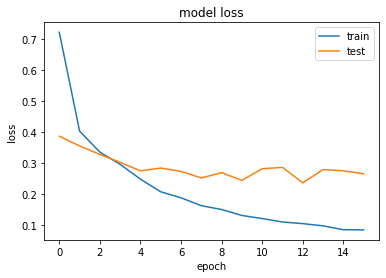

In [30]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
triplet.save("ECGIDTripletLossWithEarlyStop.h5") #

**Get the Encoding/Embedding Value for Train data(Anchor, Positive)**

In [0]:
train_anchor_embeds=Shared_DNN.predict(train_x[0])

In [0]:
train_positive_embeds=Shared_DNN.predict(train_x[1])

In [0]:
train_negative_embeds=Shared_DNN.predict(train_x[2])

In [36]:
#WE probably dont need this anywhere. We only need anchor embeddings
print("Shape of Embeddings for Train(Anchor) data:{}".format(train_anchor_embeds.shape))
print("Shape of Embeddings for Train(positive) data:{}".format(train_positive_embeds.shape))
print("Shape of Embeddings for Train(negative) data:{}".format(train_negative_embeds.shape))

Shape of Embeddings for Train(Anchor) data:(21600, 150)
Shape of Embeddings for Train(positive) data:(21600, 150)
Shape of Embeddings for Train(negative) data:(21600, 150)


**Get value of k templates for each label using trained data**

In [0]:
# Get the embeddings of the images
def get_image_embedding(test_model, input): 
  train_embeds = test_model.predict(input)
  return train_embeds

In [38]:
train_embeds=get_image_embedding(Shared_DNN, train_x[0])
print("Train Embeddings shape:{}".format(train_embeds.shape))
#print(train_embeds[0], train_embeds[1])

Train Embeddings shape:(21600, 150)


In [0]:
#Stacking anchor postive and negative on top of each other --> 5600 * 3
train_data_v_stack = np.vstack((train_x[0], train_x[1], train_x[2]))

In [0]:
train_label_v_stack = np.vstack((train_y[0], train_y[1], train_y[2]))

In [41]:
print("Shape of vertical_stacked train data: {}".format(train_data_v_stack.shape))
print("Shape of vertical_stacked train label in form of [[],[],[]]: {}".format(train_label_v_stack.shape))
print("Labels of Anchor Image:{}".format(train_label_v_stack[0]))

Shape of vertical_stacked train data: (64800, 224, 224, 1)
Shape of vertical_stacked train label in form of [[],[],[]]: (3, 21600)
Labels of Anchor Image:[ 0  0  0 ... 89 89 89]


**Calculating Threshold using Trained Data**

In [0]:
#Getting indices and embeddings belonging to every label to calculate distance for threshold. We use the stack we created so we include all the possible segments available for calculating the similarity of that person
map_threshold_calc={}
for unique_label in unique_labels:
  #print(unique_label)
  target_label=np.argwhere(train_label_v_stack[1]==unique_label)
  # List of list format,So need to change into single list using chain
  target_label = list(chain.from_iterable(target_label)) 
  start_index=target_label[0]
  end_index=target_label[-1]
  # Data stored of Positive Image value for threshold calculation
  data_per_label_threshold=train_positive_embeds[start_index:end_index+1]
  map_threshold_calc[unique_label]=data_per_label_threshold
  #print(map_threshold_calc[unique_label].shape)
  #Prints (400,150) --> 400 number of training triplets for each label, 150 neurons in the last dense layer.

In [0]:
from scipy.spatial import distance

In [63]:

map_threshold_value={}
for key in map_threshold_calc.keys():
  data=map_threshold_calc[key]
  # print(data)
  dists = distance.cdist(data, data, 'euclidean')
  #print(dists.shape)
  average_calc=[]
  for dist in dists:
    mean=np.mean(dist)
    standard_deviation=np.std(dist)   
    dist_mean=abs(dist-mean)
    # print(dist>dist_mean-0.6*standard_deviation)
    # print(dist<dist_mean+0.6*standard_deviation)
    soln_array=dist>dist_mean-0.6*standard_deviation 
    soln_array=dist[soln_array] 
    soln_array=dist<dist_mean+0.6*standard_deviation 
    soln_array1=dist[soln_array] 
    maximum=max(soln_array1)
    #maximum=max(dist)
    average_calc.append(maximum)
  threshold_for_label = sum(average_calc)/len(average_calc)
  print("Threshold for Label {}:{}".format(key, threshold_for_label))
  map_threshold_value[key]=threshold_for_label


Threshold for Label 0:3.0811662651340006
Threshold for Label 1:3.717418419602338
Threshold for Label 2:3.4169516696716484
Threshold for Label 3:3.0042801808985855
Threshold for Label 4:3.3563050084745414
Threshold for Label 5:2.6335370586682
Threshold for Label 6:2.378150434309524
Threshold for Label 7:3.1721831289047926
Threshold for Label 8:3.6995550871695007
Threshold for Label 9:5.558321728361832
Threshold for Label 10:2.88437341428778
Threshold for Label 11:3.7252564936037724
Threshold for Label 12:2.384789132905987
Threshold for Label 13:2.4452961090904135
Threshold for Label 14:2.846324741617466
Threshold for Label 15:4.358769380583852
Threshold for Label 16:3.331601873612925
Threshold for Label 17:2.4663343701833056
Threshold for Label 18:2.901744409224188
Threshold for Label 19:2.6350474888219506
Threshold for Label 20:2.6868013715846066
Threshold for Label 21:2.7786964548880833
Threshold for Label 22:3.91211141831337
Threshold for Label 23:3.374006363403013
Threshold for Labe

**Testing & Evaluation**

In [0]:
def similar_score(test_template, stored_templates):
  dists = distance.cdist(test_template, stored_templates, 'euclidean')
  #print("DIST: ",len(dists[0]))
  soln=min(dists[0])
  return soln

In [0]:
def get_k_template_values(label):
  label=int(label)
  target_label=np.argwhere(train_label_v_stack[0]==label)
  # List of list format.So need to change into single list using chain
  target_label = list(chain.from_iterable(target_label)) 
  #print(target_label)

  k_template_value=[]
  for value in target_label:
    k_template_value.append(train_embeds[value])
  #print("K templates, Value of k:{}, template shape:{}".format(len(k_template_value), len(k_template_value[0])))
  return k_template_value

In [48]:
test_data_v_stack=np.vstack((test_x[0], test_x[1], test_x[2]))
test_label_v_stack=np.vstack((test_y[0], test_y[1], test_y[2]))
print("Shape of vertical_stacked test data: {}".format(test_data_v_stack.shape))
print("Shape of vertical_stacked test label in form of [[],[],[]]: {}".format(test_label_v_stack.shape))
print("Labels of Image to test:{}".format(test_label_v_stack[0]))

Shape of vertical_stacked test data: (16200, 224, 224, 1)
Shape of vertical_stacked test label in form of [[],[],[]]: (3, 5400)
Labels of Image to test:[ 0  0  0 ... 89 89 89]


**Authentication**

In [0]:
def authentication(test_segment,claimed_label):
  k_template_value=get_k_template_values(claimed_label)
  test_embeds = Shared_DNN.predict(test_segment)
  score=similar_score(test_embeds, k_template_value)
  threshold=map_threshold_value[int(claimed_label)]
  if score>threshold:
    print("You are not authenticated with dissimarity score:{}".format(score))
    return 'false'
  else:
    print("Authentication Successful! with dissimarity score:{}".format(score))
    return 'true'

In [0]:
all_test_embeds=Shared_DNN.predict(test_x[0])

In [64]:
t_pos=0
f_neg=0
def countMetricsTruePositives():
  true_positives=0
  #total=len(all_test_embeds)
  count=0
  for i in range(len(all_test_embeds)):
    count=count+1
    test_embed=all_test_embeds[i]
    claimed_label=test_y[0][i]
    test_segment=test_x[0][i].reshape(1,224,224,1)
    response=authentication(test_segment,claimed_label)
    if response == "true":
      true_positives=true_positives+1
    else:
      print("Segment at i= ",i)
  t_pos=true_positives
  print("True Positives:" ,true_positives)
  f_neg=count-true_positives
  print("False Negatives:" ,f_neg)
  return t_pos,f_neg

t_pos,f_neg=countMetricsTruePositives()

Streaming output truncated to the last 5000 lines.
Authentication Successful! with dissimarity score:0.8892280615098467
Authentication Successful! with dissimarity score:1.2319668255804925
Authentication Successful! with dissimarity score:0.5502042457199141
Authentication Successful! with dissimarity score:0.45715601836162956
Authentication Successful! with dissimarity score:0.5636763625235356
Authentication Successful! with dissimarity score:0.8892280615098467
Authentication Successful! with dissimarity score:0.6948671147979285
Authentication Successful! with dissimarity score:0.8892280615098467
Authentication Successful! with dissimarity score:0.45715601836162956
Authentication Successful! with dissimarity score:2.397424403616731
Authentication Successful! with dissimarity score:1.2319668255804925
Authentication Successful! with dissimarity score:0.5502042457199141
Authentication Successful! with dissimarity score:2.397424403616731
Authentication Successful! with dissimarity score:0.

In [60]:

t_neg1=0
f_pos1=0
n=int(num_test_per_class)
#--every image with every label

def countMetricsTrueNegatives1():
  true_negatives=0
  count=0
  #total=int(len(all_test_embeds)*47)
  count=0
  for i in range(len(all_test_embeds)):
    test_embed=all_test_embeds[i]
    test_segment=test_x[0][i].reshape(1,224,224,1)
    #print(n)
    for j in range(1,len(test_y[0]),n):
      count=count+1
      if test_y[0][i] == test_y[0][j]:
        continue
      else:
        claimed_label=int(test_y[0][j:j+1])
        response=authentication(test_segment,claimed_label)
        if response == "false":
          true_negatives=true_negatives+1
        else:
          print("image at index i: ",i," authenticated with : ",claimed_label," gives false positive")
  t_neg=true_negatives
  print("True Negatives:" ,t_neg)
  f_pos=count-true_negatives
  print("False Positives:" ,f_pos)      
  return t_neg,f_pos

t_neg,f_pos=countMetricsTrueNegatives1()


Streaming output truncated to the last 5000 lines.
You are not authenticated with dissimarity score:3.8944967338179004
You are not authenticated with dissimarity score:2.6996833013480726
You are not authenticated with dissimarity score:4.154511330396962
You are not authenticated with dissimarity score:5.42544443642161
You are not authenticated with dissimarity score:2.3738474805829113
You are not authenticated with dissimarity score:2.966627168100995
You are not authenticated with dissimarity score:4.221663273817123
You are not authenticated with dissimarity score:2.7385335786206593
You are not authenticated with dissimarity score:4.470842408580601
You are not authenticated with dissimarity score:2.9330498512465435
You are not authenticated with dissimarity score:4.8434913555038355
You are not authenticated with dissimarity score:2.298523911429853
You are not authenticated with dissimarity score:2.600169545165582
You are not authenticated with dissimarity score:2.3816548344330553
You a

In [65]:
#TP+TN/TP+TN+FN x 100%
total_cases=t_pos+f_neg+t_neg+f_pos
numerator=t_pos+t_neg
accuracy=numerator/total_cases
accuracy=accuracy*100
print("Accuracy is: {}%".format(accuracy))

Accuracy is: 97.08363858363859%


In [62]:
false_acceptance = f_pos/(f_pos+t_neg)
false_rejection = f_neg/(t_pos+f_neg)
print("FAR:{}".format(false_acceptance))
print("FRR:{}".format(false_rejection))
#print("Average of FAR & FRR:{}".format((float(false_acceptance)+float(false_rejection))*50))

FAR:0.028855967078189302
FRR:0.4135185185185185
